## Justification Check

1. dimension of hilbert space
    - by varying the dimension to check whether the Rabi oscillation

2. varying the interaction strength
3. dt and T



In [1]:
import time

import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
from qutip import (Qobj, about, basis, coherent, coherent_dm, create, destroy, identity, 
                   expect, fock, fock_dm, mesolve, qeye, sigmax, sigmay, mcsolve,
                   sigmaz, tensor, thermal_dm, Bloch, about, plot_expectation_values, fsesolve, thermal_dm)

%matplotlib inline

In [16]:
Hilbert_dim_phi = 2 ** 5
Hilbert_initial_phi = 1

Hilbert_dim_x = 2 ** 5
Hilbert_initial_x = 10

#psi0 = tensor(thermal_dm(Hilbert_dim_phi, Hilbert_initial_phi), thermal_dm(Hilbert_dim_x, Hilbert_initial_x))
psi0 =  tensor(fock(Hilbert_dim_phi, Hilbert_initial_phi), fock(Hilbert_dim_x, Hilbert_initial_x))
anni_phi = tensor(destroy(Hilbert_dim_phi), qeye(Hilbert_dim_x))
anni_x = tensor(qeye(Hilbert_dim_phi), destroy(Hilbert_dim_x))
# qeye = identity


In [17]:
# expectation operators
e_ops = [anni_x.dag() * anni_x, anni_phi.dag() * anni_phi]
c_ops = []

(<Figure size 800x400 with 2 Axes>,
 array([[<AxesSubplot: ylabel='<n_x>'>],
        [<AxesSubplot: xlabel='time', ylabel='<n_phi>'>]], dtype=object))

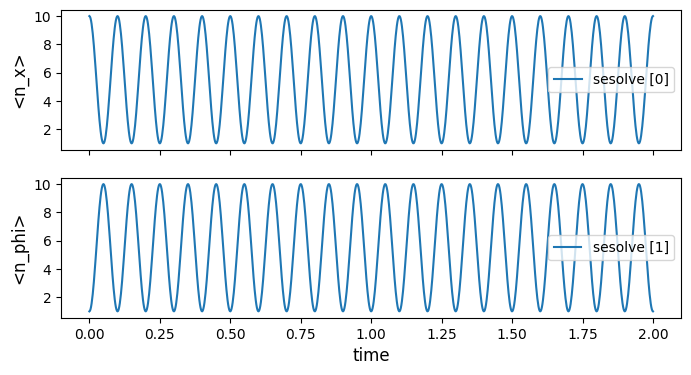

In [18]:
w_phi = 1000.0 * 2 * np.pi
w_x = 100.0 * 2 * np.pi
g_weak = 5 * 2 * np.pi # Rabi frequency
g_strong = 7.5 * 2 * np.pi
# Case 1: Time independent Interaction Hamiltonian

#H_weak = w_phi * anni_phi.dag() * anni_phi + w_x * anni_x.dag() * anni_x +  g_weak * (anni_phi.dag() * anni_x + anni_phi * anni_x.dag())
H_weak =  g_weak * (anni_phi.dag() * anni_x + anni_phi * anni_x.dag())
times = np.linspace(0, 10 * 2 * np.pi / g_weak, 1000) # 10 times the Rabi oscillation, 1000 steps

result_me_weak = mesolve(H_weak, psi0, times, c_ops, e_ops)
#result_brme_weak = brmesolve(H_weak, psi0, times, a_ops, e_ops)
plot_expectation_values(
    [result_me_weak],
    ylabels=["<n_x>", "<n_phi>"],
    show_legend=True,
)

In [21]:
peaks_posi, _ = find_peaks(result_me_weak.expect[0])
print('Period for Rabi oscillation is {:.3f}s'.format(times[peaks_posi[1]] - times[peaks_posi[0]]))
print(times[peaks_posi[1]], times[peaks_posi[0]])
print('Period by g is {:.3f}'.format( 2 * np.pi / np.sqrt(4 * g_weak ** 2)))

Period for Rabi oscillation is 0.100s
0.20020020020020018 0.10010010010010009
Period by g is 0.100


### Adding a time dependence

(<Figure size 800x400 with 2 Axes>,
 array([[<AxesSubplot: ylabel='<n_cav>'>],
        [<AxesSubplot: xlabel='time', ylabel='<n_atom>'>]], dtype=object))

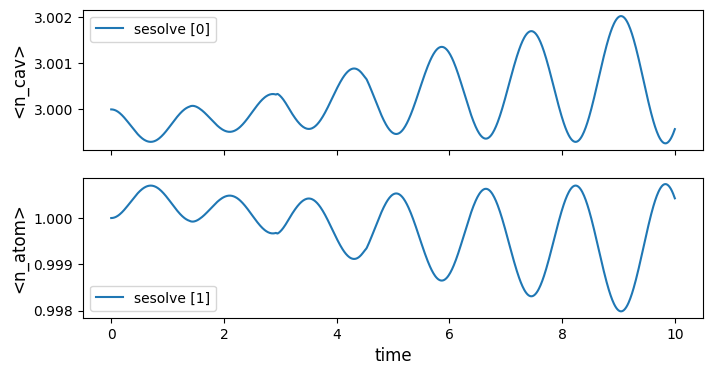

In [6]:
w_phi = 10.0 * 2 * np.pi
w_x = 10.0 * 2 * np.pi
g_weak = 1 * 2 * np.pi # Rabi frequency
g_strong = 0.75 * 2 * np.pi
Omega = 1 * 2 * np.pi

# Case 1: Time independent Interaction Hamiltonian

H_weak_time_dep = w_phi * anni_phi.dag() * anni_phi + w_x * anni_x.dag() * anni_x +  g_weak * (anni_phi.dag() * anni_x + anni_phi * anni_x.dag())
times = np.linspace(0, 10 * 2 * np.pi / g_weak, 1000) # 10 times the Rabi oscillation, 1000 steps

result_me_weak = mesolve(H_weak, psi0, times, c_ops, e_ops)
#result_brme_weak = brmesolve(H_weak, psi0, times, a_ops, e_ops)
plot_expectation_values(
    [result_me_weak],
    ylabels=["<n_cav>", "<n_atom>"],
    show_legend=True,
)

In [7]:
Hilbert_dim_phi = 2 ** 6
Hilbert_initial_phi = 1

Hilbert_dim_x = 2 ** 6
Hilbert_initial_x = 3

psi0 = tensor(fock(Hilbert_dim_phi,Hilbert_initial_phi), fock(Hilbert_dim_x, Hilbert_initial_x))
anni_phi = tensor(destroy(Hilbert_dim_phi), qeye(Hilbert_dim_x))
anni_x = tensor(qeye(Hilbert_dim_phi), destroy(Hilbert_dim_x))
# qeye = identity


In [8]:
w_phi = 10.0 * 2 * np.pi
w_x = 10.0 * 2 * np.pi
g_weak = 1 * 2 * np.pi # Rabi frequency
g_strong = 0.75 * 2 * np.pi
Omega = 1 * 2 * np.pi


g = g_weak

In [9]:
# expectation operators
e_ops = [anni_x.dag() * anni_x, anni_phi.dag() * anni_phi]
c_ops = []

In [10]:
def Hamiltonian_t(t, args):
    H_x = args['H_x']
    H_phi = args['H_phi']
    H_int = args['H_int']
    w_phi = args['w_phi']
    w_x = args['w_x']
    g = args['g']
    Omega = args['Omega']
    
    return w_phi * H_phi + w_x * H_x +  g * (H_int * np.exp(1j * Omega * t) + H_int.dag() * np.exp(-1j * Omega * t))

(<Figure size 800x400 with 2 Axes>,
 array([[<AxesSubplot: ylabel='<n_cav>'>],
        [<AxesSubplot: xlabel='time', ylabel='<n_atom>'>]], dtype=object))

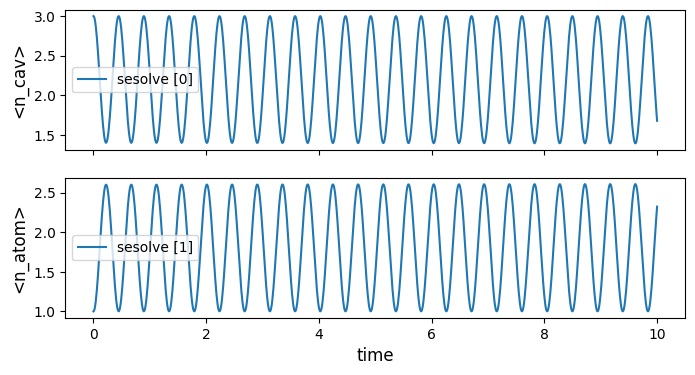

In [11]:
H_phi = anni_phi.dag() * anni_phi
H_x = anni_x.dag() * anni_x
H_int = anni_phi.dag() * anni_x

H_args = {'H_x': H_x, 'H_phi': H_phi, 'H_int': H_int, 'w_phi': w_phi, 'w_x': w_x, 'g': g, 'Omega' : Omega}

output = mesolve(Hamiltonian_t, psi0, times, c_ops, e_ops, H_args)

plot_expectation_values(
    [output],
    ylabels=["<n_cav>", "<n_atom>"],
    show_legend=True,
)

In [12]:
peaks_posi, _ = find_peaks(output.expect[0])
print('Period for Rabi oscillation is {:.3f}s'.format(2 * times[peaks_posi[1]] - 2 * times[peaks_posi[0]]))
print('Period by Theory is {:.3f}'.format( 2 * np.pi / np.sqrt(g ** 2  + (Omega - w_x + w_phi) ** 2)))

Period for Rabi oscillation is 0.881s
Period by Theory is 0.707
